In [18]:
# get sputtering yield from etch.dat

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [20]:
# path2target = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/tersoff/atom6750/result/0deg_1000eV'
# path2target = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/atom6750/model07/0deg_500eV'
# path2target = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/sw/atom6750/result/0deg_1000eV/'
path2target = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/sw/deep_substrate/etch_files/0deg_200eV'

In [21]:
with open(os.path.join(path2target, 'etch.dat'), mode='r') as f:
    lines = [s.strip() for s in f.readlines()]

In [22]:
idx_list = []
for i, l in enumerate(lines):
    if 'ITEM: TIMESTEP' in l:
        idx_list.append(i)

idx_list_shift = idx_list[1:]
idx_list_shift.append(len(lines))

In [23]:
block = []
for idx1, idx2 in zip(idx_list, idx_list_shift):
    block.append(lines[idx1:idx2])

In [24]:
result = []

timestep_idx = 1
num_sputter_atom_idx = 3
for b in block:
    timestep = int(b[timestep_idx])
    num_sputter_atom = int(b[num_sputter_atom_idx])
    result.append(np.array([timestep, num_sputter_atom]))

result = np.array(result)

In [25]:
total_num_sputter_atom = result[:,1].sum()

In [26]:
insert_atom_every = 20000
last_timestep = int(block[-1][timestep_idx])
def get_num_insert_atom(insert_atom_every, last_timestep):
    return last_timestep // insert_atom_every

In [27]:
total_num_insert_atom = get_num_insert_atom(insert_atom_every, last_timestep)

In [28]:
sp_yield = total_num_sputter_atom / total_num_insert_atom
sp_yield_depo = (total_num_sputter_atom - total_num_insert_atom) / total_num_insert_atom

In [29]:
print(f'total number of injected atoms: {total_num_insert_atom}')
print(f'total number of sputtered atoms: {total_num_sputter_atom}')
print(f'sputtering yield: {sp_yield}')
print(f'sputtering yield considering deposition: {sp_yield_depo}')

total number of injected atoms: 3000
total number of sputtered atoms: 3527
sputtering yield: 1.1756666666666666
sputtering yield considering deposition: 0.17566666666666667


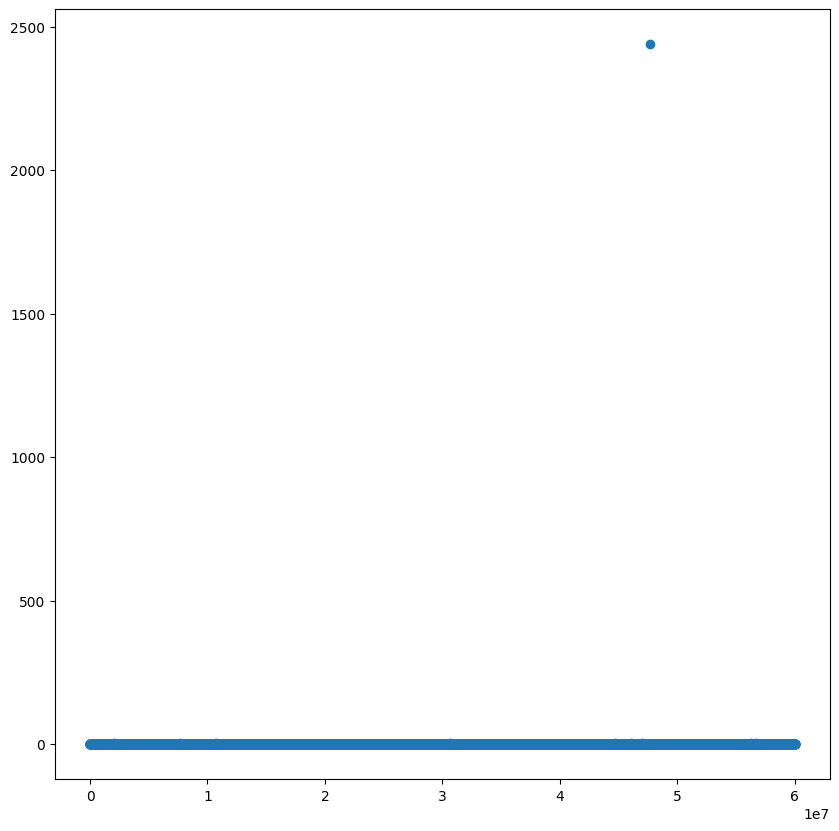

In [30]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot()

df = pd.DataFrame(data=result, columns=['timestep', 'sy'])
ax.scatter(df['timestep'], df['sy'])
# ax.set_ylim(0, 20)

In [31]:
upper_n_injected_atom = 750

df_filtered = df.loc[df['timestep'] <= upper_n_injected_atom * insert_atom_every]

In [32]:
total_n_sputtered_atom = df_filtered['sy'].sum()
total_n_injected_atom = df_filtered['timestep'].values[-1] / insert_atom_every
sputtering_yield = total_n_sputtered_atom / total_n_injected_atom
sputtering_yield_depo = (total_n_sputtered_atom - total_n_injected_atom) / total_n_injected_atom

In [33]:
print(f'total number of injected atoms: {total_n_injected_atom}')
print(f'total number of sputtered atoms: {total_n_sputtered_atom}')
print(f'sputtering yield: {sputtering_yield}')
print(f'sputtering yield considering deposition: {sputtering_yield_depo}')

total number of injected atoms: 750.0
total number of sputtered atoms: 273
sputtering yield: 0.364
sputtering yield considering deposition: -0.636


In [34]:
# import os
# import shutil


# path2root = '/home/y1u0d2/result/lammps/sputtering/Si/tersoff/atom6750'
# path2template = '/home/y1u0d2/result/lammps/sputtering/Si/tersoff/atom6750/template'

# energy_range = [10, 50, 100, 200, 500, 750, 1000]

# def get_inject_energy(path2target):
#     with open(path2target, mode='r') as f:
#         lines = [s.strip() for s in f.readlines()]
#         for line in lines:
#             if 'enrg' in line:
#                 print(line)
#                 break
#     return

# for energy in energy_range:
#     path2target = os.path.join(path2root, f'0deg_{energy}eV')
#     if os.path.exists(path2target):
#         print(path2target)
#         get_inject_energy(os.path.join(path2target, 'in.tersoff'))